<a href="https://colab.research.google.com/github/AnikaRanjan/MDST/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering and Machine Learning

### **All exercises will be using your chosen dataset**









## Step 1: Import your dataset using the tutorial from the slides

## Step 2: Install necessary libraries. We are using Scikit Learn for week 3

In [ ]:
!pip install pandas numpy scikit-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, accuracy_score, classification_report, ConfusionMatrixDisplay

## Exercises

### Scikit-Learn Docs, ML Interpretability Book, and Demo for Reference

#### [Scikit-Learn](https://scikit-learn.org/stable/)
#### [ML Interpretability](https://christophm.github.io/interpretable-ml-book/)
#### [Demo](https://mdst-ai-in-healthcare.streamlit.app/)

Import your **preprocessed dataset**

In [ ]:
# TODO: Load your dataset with pandas
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sleep_health_and_lifestyle_dataset_clean.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder
0,0,27,6.1,6,42,6,77,4200,0
1,0,28,6.2,6,60,8,75,10000,0
2,0,28,6.2,6,60,8,75,10000,0
3,0,28,5.9,4,30,8,85,3000,1
4,0,28,5.9,4,30,8,85,3000,1
...,...,...,...,...,...,...,...,...,...
369,1,59,8.1,9,75,3,68,7000,1
370,1,59,8.0,9,75,3,68,7000,1
371,1,59,8.1,9,75,3,68,7000,1
372,1,59,8.1,9,75,3,68,7000,1


In [ ]:
df.columns

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

### Exercise 1: Feature Creation

Creating new features from the one that you already have can enhance model performance and interpretability.

In [ ]:
# TODO: Choose a numerical feature (df['num_feature']) and use pd.cut() to bin the feature into categorical bins.
num_feature = df['Heart Rate']
df['Heart Rate Categoricl'] = pd.cut(num_feature, bins=2, labels = ['Normal', 'High'])
df['Heart Rate Categoricl'].value_counts()

,count
Heart Rate Categoricl,
Normal,350
High,24


The Log transformation most effective on data that is right-skewed by shrinking the right tail and creating a more normal distribution. It is also used for transforming data to be more robust to outliers

In [ ]:
# TODO: Choose a numerical feature to use log transformation on. Use numpy.log1p()
num_feature = df['Sleep Duration']
df['Sleep Duration Log'] = np.log1p(num_feature)
df['Sleep Duration Log'].value_counts()

,count
Sleep Duration Log,
2.104134,36
1.945910,31
2.174752,28
2.014903,26
1.960095,25
2.163323,24
2.028148,20
2.091864,19
2.208274,15


In [ ]:
# TODO: Create an interaction feature from existing ones that you think would help enhance the model. This might require some research
# (e.g., house_size * location_quality or weight / height^2).
df.sample(2)
df['Sleep Duration * Stress Level'] = df['Sleep Duration'] * df['Stress Level']
df['Sleep Duration * Stress Level'].value_counts()



,count
Sleep Duration * Stress Level,
48.0,31
48.8,23
28.8,22
45.5,18
39.0,17
46.2,14
26.4,14
25.2,14
44.1,13


### Exercise 2: Encoding

Dummy encoding is a technique for converting categorical variables into columns of 1's and 0's So the model can utilize these features for making predictions. This comes at the cost of increased dimensionality. Dummy encoding is typically done on a categorical variable that doesn't have a particular order (e.g., low, medium, high)

In [ ]:
# TODO: Choose a categorical feature to encode using dummy encoding (use the drop_first = True argument)
encoder = pd.get_dummies(df['Heart Rate Categoricl'], drop_first = True)
encoder
df

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Heart Rate Categoricl,Sleep Duration Log,Sleep Duration * Stress Level
0,0,27,6.1,6,42,6,77,4200,0,High,1.960095,36.6
1,0,28,6.2,6,60,8,75,10000,0,Normal,1.974081,49.6
2,0,28,6.2,6,60,8,75,10000,0,Normal,1.974081,49.6
3,0,28,5.9,4,30,8,85,3000,1,High,1.931521,47.2
4,0,28,5.9,4,30,8,85,3000,1,High,1.931521,47.2
...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,8.1,9,75,3,68,7000,1,Normal,2.208274,24.3
370,1,59,8.0,9,75,3,68,7000,1,Normal,2.197225,24.0
371,1,59,8.1,9,75,3,68,7000,1,Normal,2.208274,24.3
372,1,59,8.1,9,75,3,68,7000,1,Normal,2.208274,24.3


Ordinal Encoding is used for encoding categorical variables that have a particular order to them (e.g., low, medium, high)

In [ ]:
# TODO: Choose a categorical feature to encode using ordinal encoding and define the encoder
# use OrdinalEncoder(categories = [['low','medium', 'high']])
num_feature = df['Physical Activity Level']
df['Physical Activity Level Categorical'] = pd.cut(num_feature, bins=3, labels = ['low','medium', 'high'])
df['Physical Activity Level Categorical'].value_counts()

encoder = OrdinalEncoder(categories = [['low','medium', 'high']])
encoder


OrdinalEncoder(categories=[['low', 'medium', 'high']])

In [ ]:
# TODO: Use ordinal encoding to encode variable and put it into a new column in the dataframe
# use encoder.fit_transform(df[['feature']])
df['Physical Activity Encoded'] = encoder.fit_transform(df[['Physical Activity Level Categorical']])
df

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Heart Rate Categoricl,Sleep Duration Log,Sleep Duration * Stress Level,Physical Activity Level Categorical,Physical Activity Encoded
0,0,27,6.1,6,42,6,77,4200,0,High,1.960095,36.6,low,0.0
1,0,28,6.2,6,60,8,75,10000,0,Normal,1.974081,49.6,medium,1.0
2,0,28,6.2,6,60,8,75,10000,0,Normal,1.974081,49.6,medium,1.0
3,0,28,5.9,4,30,8,85,3000,1,High,1.931521,47.2,low,0.0
4,0,28,5.9,4,30,8,85,3000,1,High,1.931521,47.2,low,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,59,8.1,9,75,3,68,7000,1,Normal,2.208274,24.3,high,2.0
370,1,59,8.0,9,75,3,68,7000,1,Normal,2.197225,24.0,high,2.0
371,1,59,8.1,9,75,3,68,7000,1,Normal,2.208274,24.3,high,2.0
372,1,59,8.1,9,75,3,68,7000,1,Normal,2.208274,24.3,high,2.0


### Exercise 3: Scaling

Before creating a model, it's good practice to use StandardScaler(). This is a preprocessing tool from scikit-learn which is used for transforming a numerical data distribution to have a mean of 0 and a standard deviation of 1. This ensures that no feature dominates the model soley because it has larger numerical values.

In [ ]:
# TODO: Choose the numerical columns that you want to have standardized.
cols = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Stress Level', 'Heart Rate', 'Sleep Duration * Stress Level']

In [ ]:
# TODO: Split the data into the features that you want to use (X) and the target (y).
# Choose any columns/festures that you think might create a good model
X = df[['Age', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps', 'Stress Level', 'Heart Rate', 'Sleep Duration * Stress Level', 'Quality of Sleep', 'Stress Level', 'Physical Activity Encoded']]
y =  df['Sleep Disorder']

We are now going to split the data into train and test sets. It is standard to use a test set size that is 20% of your total data and the remaining data for model training

In [ ]:
# TODO: Split the data into train data and test data. use train_test_split(X, y, test_size=0.2, random_state=42)
# it is important to scale the training and testing data separately to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, X_test, y_train, y_test = ...

In [ ]:
# TODO: Initialize the scaler (scaler = StandardScaler())
scaler = StandardScaler()

In [ ]:
# TODO: use scaler.fit_transform(X_train[cols]) for the standard scaler to transform training data

X_train[cols] = scaler.fit_transform(X_train[cols])

In [ ]:
# TODO: use scaler.transform(y_train[cols]) to transform the test data

X_test[cols] = scaler.transform(X_test[cols])

In [ ]:
# Run this line of code to save the scaler as you will need it later
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

### Exercise 4: Model Creation

Now it's time to create some models! For the purposes of this exercise, we will only be exploring linear regression and logistic regression.

**Do these exercises if your target is numerical**. The machine learning task in this case would be **regression**.

Here, we will create a linear regression model.

In [ ]:
# TODO: Define a linear regression model. (LinearRegression())
linear_model = ...

In [ ]:
# TODO: Fit the model using the training data

# linear_model.fit(...)

In [ ]:
# TODO: use .predict() on the testing data to make predictions
linear_model_predictions = ...

In [ ]:
# TODO: calculate the model coefficients using coef_

The model coefficients are also called the **model parameters** which determine how much each feature has an effect on the model. Come up with an interpretation of what the model parameter for one of your features mean for the linear model (the order of the coefficients is the same as the order of the dataset that was used to train the model. Also remember that if you standardized a feature, the interpretation should be in standard deviation units):

**Do these exercises if your target is categorical**. The machine learning task in this case would be **classification**.

Logistic Regression is a model that maps the input data to an S-shaped curve and uses a threshold (0.5) to predict the probability of a certain categorical class. It then outputs the most probable class.

In [ ]:
# TODO: Define a logistic regression model. (LogisticRegression())
logistic_model = LogisticRegression()

In [ ]:
# TODO: Fit the model using the traning data

logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# TODO: use .predict() on the testing data to make predictions
logistic_model_predictions = logistic_model.predict(X_test)

In [ ]:
# TODO: use coef_ to display the model coefficients used for the logistic regression model
logistic_model.coef_

array([[-1.34002497,  0.65966651, -0.28143083,  0.35059799,  0.41264875,
        -0.35419888, -0.10830422,  0.96421131,  0.41264875, -0.1260473 ],
       [ 0.64186944,  0.17160827, -1.10590917,  0.52273261,  0.0900955 ,
         0.85804052, -0.69115992, -0.48122393,  0.0900955 ,  1.71260735],
       [ 0.69815553, -0.83127478,  1.38733999, -0.8733306 , -0.50274425,
        -0.50384164,  0.79946415, -0.48298738, -0.50274425, -1.58656005]])

The model coefficients are also called the **model parameters** which determine how much each feature has an effect on the model. Come up with an interpretation of what the model parameter for one of your features mean for the logistic regression model (the order of the coefficients is the same as the order of the dataset that was used to train the model):

These models are what we call **inherently interpretable**. Models that are not inherently interpretable include Random Forest, Neural Networks, etc...

### Exercise 5: Model Evaluations

In this section, we will be evaluating the performance of the model that you trained above.

Do these exercises if you trained a **linear regression** model.

In [ ]:
# TODO: calculate mean squared error using mean_squared_error on the test data

The mean squared error is the **cost function** of the linear regression model. The best fit line minimizes the average squared loss between the true and predicted values in the data. Since the error is squared, how sensitive is this value to outliers in the data?

In [ ]:
# TODO: calculate root mean squared error using root_mean_sqaured_error on the test data

Root Mean Squared Error is a more interpretable since the units are converted back into the units of the target variable. interpret the value of RMSE in the context of your data:

In [ ]:
# TODO: calculate mean absolute error using mean_absolute_error on the test data

This value tells us the average distance between the true data points in our test set and the predicted values. How robust is mean absolute error to outliers?

In [ ]:
# TODO: calculate r^2 score using r2_score

The r^2 value is used to determine how much of the target variance was explained by our value. a value of 0 explains none of the variance while a value of 1 means that the model is a perfect fit to the data.

Do these exercises if you trained a **logistic regression** model.

In [ ]:
# TODO: calculate the accuracy of the model using accuracy_score
accuracy_score(y_test, logistic_model_predictions)

0.8933333333333333

This determines the percentage of instances in the test data that were classified correctly.

In [ ]:
# TODO: print a classification report using classification_report
print(classification_report(y_test, logistic_model_predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.87      0.81      0.84        16
           2       0.80      0.75      0.77        16

    accuracy                           0.89        75
   macro avg       0.87      0.85      0.86        75
weighted avg       0.89      0.89      0.89        75



Precision: Measures the accuracy of positive predictions in the class (higher value means less false positives)

Recall: The ability to find all actual positives in the class (higher value means less false negatives)

F1 Score: balancing metric of the precision and recall

Support: Number of actual occurences in that class

Determine the accuracy of the model when it comes to false positives and negatives:

### Exercise 6: Model Visualizations

Do these exercises if you trained a **linear regression** model.

In [ ]:
# TODO: create a variable for the residuals (actual - predicted) for the linear model
residuals = ...

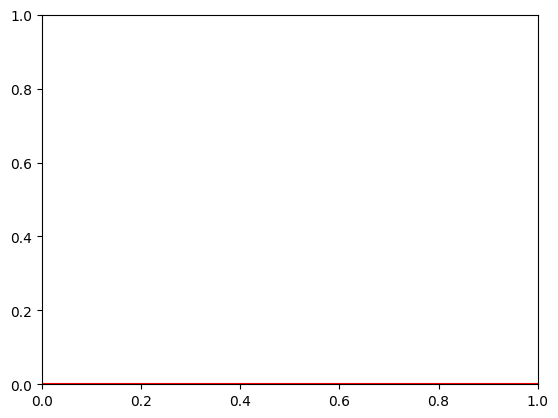

In [ ]:
# TODO: create a scatter plot of the residuals vs. predictions using plt.scatter()

# plt.scatter(...)

# this line of code creates a line through y = 0
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Determine how the residuals are distributed. If they are randomly scattered around the y=0 line, this indicates a good linear fit.

Do these exercises if you trained a **logistic regression** model.

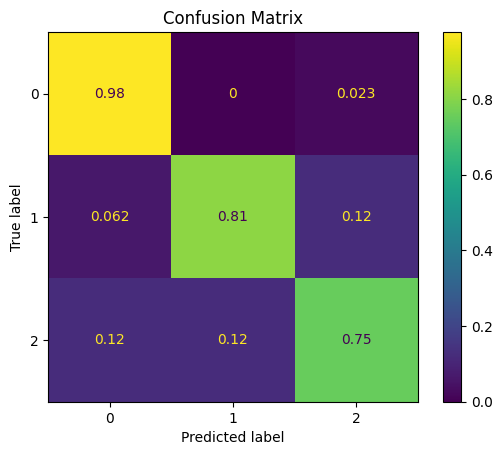

In [ ]:
# TODO: Create a confusion matrix using the test and prediction data. use the normalize="true" argument

ConfusionMatrixDisplay.from_predictions(y_test, logistic_model_predictions, normalize="true")
plt.title("Confusion Matrix")
plt.show()

This is a more visual understanding of how the model made predictions for the different classes in the target variable. Summarize how the model makes its predictions. Specifically, why might the model be giving false positives or false negatives for certain classes? What factors could be influencing the models predictions such as the distribution of the target variable, potential overfitting, etc...

### Exercise 7: Further Exploration

Keep experimenting with different ways to transform your data to make it model ready. Also, try out different models and see how performance is impacted.

You can save your model, train data, test data etc.. as well using joblib.dump() as we did with the scaler